Installation des packages nécessaires 

In [ ]:
pip install geopandas

In [ ]:
pip install contextily

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
import geopandas as gpd

In [ ]:
import contextily as ctx

In [ ]:
!pip install --upgrade botocore==1.23.26  #Sur colab, sinon bug
!pip install --upgrade urllib3==1.22.0 #Sur colab, sinon bug
!pip install py7zr #Sur colab, sinon bug
!pip install s3fs #Sur colab, sinon bug
!git clone https://github.com/InseeFrLab/cartogether.git
%cd ./cartogether
!pip install -r requirements.txt
!pip install .

**Visualisation et description de la base "Centrales Nucléaire"**

La base "centrales" comportent des informations sur chacune des centrales nucléaires de France métropolitaine. 

Celle qui nous intéressent correspondent aux données géographiques (latitude, longitude, commune, département) 

In [ ]:
centrales = pd.read_csv("/content/centrales_nucleaires.csv",sep=',',encoding_errors='ignore')

#Conversion des coordonnées GPS d'un point en une géométrie exploitable sur Geopandas 
geometry = gpd.points_from_xy(centrales["Commune long"], centrales["Commune Lat"])

#Création d'un dataframe avec geométrie du point à localiser 
geo_centrales = gpd.GeoDataFrame(centrales, crs="EPSG:4326", geometry=geometry)
geo_centrales.crs

geo_centrales.head()

,Centrale nuclaire,Nombre de racteur,Commune,Commune Lat,Commune long,Dpartement,Rg,Palier,Puissance thermique (MWt),Puissance brute (MWe),Puissance nette (MWe),Dbut construction (premier racteur),Raccordement au rseau (premier racteur),Mise en service (premier racteur),geometry
0,Belleville,2,Belleville,47.507221,2.849960,Cher,54,P'4,7634,2726,2620,1980,1987,1988,POINT (2.84996 47.50722)
1,Blayais,4,Braud-et-Saint-Louis,45.247987,-0.626174,Gironde,32,CP1,11140,3804,3640,1977,1981,1981,POINT (-0.62617 45.24799)
2,Bugey,4,Saint-Vulbas,45.832913,5.290324,Ain,13,CP0,11140,3724,3580,1972,1978,1979,POINT (5.29032 45.83291)
3,Cattenom,4,Cattenom,49.406263,6.243668,Moselle,50,P'4,15268,5448,5200,1979,1986,1987,POINT (6.24367 49.40626)
4,Chinon-B,4,Avoine,47.205697,0.181982,Indre-et-Loire,40,CP2,11140,3816,3620,1977,1982,1984,POINT (0.18198 47.20570)


**Répartition géographique des centrales nucléaires sur le territoire de France métropolitaine**

19 centrales sont représentées, localisées très souvent le long ou proche d'un fleuve (également proche d'une grande ville). 

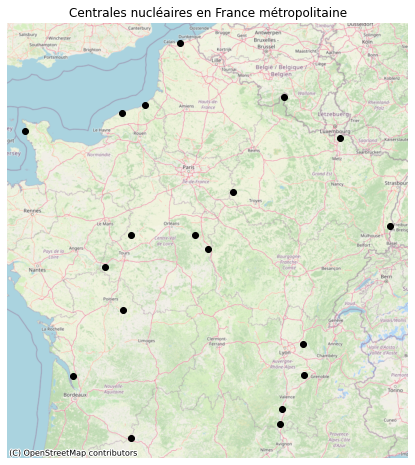

In [ ]:
base = geo_centrales.to_crs(3857).plot(color='black',figsize=(8,8))
base.set_axis_off()
base.set_title("Centrales nucléaires en France métropolitaine")
#ctx.add_basemap(base, source=ctx.providers.Stamen.Watercolor)
ctx.add_basemap(base,source=ctx.providers.OpenStreetMap.Mapnik)

**La mesure du risque lié au nucléaire que nous avons choisie se base sur les normes établies par les autorités:** 


*   Zone d'évacuation : rayon de 5km autour de la centrale 
*   Zone PPI (plan particulier d'intervention) : rayon de 20km 
*   Zone de contamination (basée sur Fukushima) : rayon de 60km 
*   Zone correspondant aux recommandations d'évacuation des Etats-Unis : rayon de 80km 
*   Zone élargie de PPI demandé par GreenPeace : rayon de 100km 

On calcule alors un risque (évalué de 1 à 5) selon la proximité géographique d'une habitation à une centrale nucléaire. 

Par exemple, si on considère une zone de couverture de 50km de rayon autour de chaque centrale nucléaire :

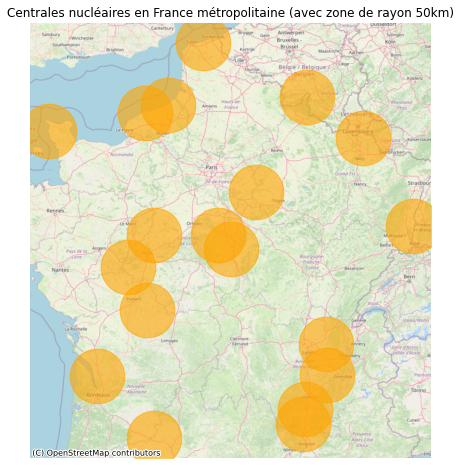

In [ ]:
base = geo_centrales.to_crs(3857).plot(alpha=0.6,color='orange',markersize=3000,figsize=(8,8))
base.set_axis_off()
base.set_title("Centrales nucléaires en France métropolitaine (avec zone de rayon 50km)")
#ctx.add_basemap(base, source=ctx.providers.Stamen.Watercolor)
ctx.add_basemap(base, source=ctx.providers.OpenStreetMap.Mapnik)

In [ ]:
#Nombre de centrales nucléaires par département 
centrales["Dpartement"].value_counts()

Seine-Maritime     2
Cher               1
Gironde            1
Loir-et-cher       1
Isre               1
Aube               1
Nord               1
Tarn-et-Garonne    1
Manche             1
Haut-Rhin          1
Loiret             1
Ardche             1
Vienne             1
Ardennes           1
Indre-et-Loire     1
Moselle            1
Ain                1
Drme               1
Name: Dpartement, dtype: int64

In [ ]:
densite_pop = pd.read_csv("/content/INSEE_densitepop_carreaux_1km_met.csv",sep=',')
densite_pop.head()

,Idcar_1km,I_est_1km,Ind,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men,lcog_geo
0,CRS3035RES1000mN2029000E4254000,1,2.0,0.3,0.0,0.6,0.0,59349.4,145.1,0.1,...,0.2,0.0,0.4,0.3,0.7,0.1,0.0,0.2,0.9,2A041
1,CRS3035RES1000mN2030000E4251000,1,4.0,0.7,0.1,1.2,0.1,118698.9,290.1,0.2,...,0.3,0.1,0.9,0.5,1.4,0.3,0.0,0.3,1.8,2A041
2,CRS3035RES1000mN2030000E4252000,1,6.0,0.5,0.2,2.0,0.3,162912.9,334.3,0.3,...,0.1,0.5,1.8,1.5,1.2,0.3,0.0,0.3,2.6,2A041
3,CRS3035RES1000mN2030000E4253000,1,14.0,1.2,0.4,4.8,0.8,380130.2,780.0,0.8,...,0.2,1.2,4.0,3.6,2.8,0.8,0.0,0.8,6.2,2A041
4,CRS3035RES1000mN2030000E4254000,1,9.0,1.6,0.2,2.7,0.2,267072.5,652.8,0.3,...,0.7,0.2,1.9,1.2,3.3,0.6,0.0,0.8,3.9,2A041


In [ ]:
pop = pd.read_excel("/content/insee_densite_pop.xlsx")
pop.head()

,Observatoire des territoires - ANCT,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Insee - RP - données historiques depuis 1968 (...,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Densité de population
3,codgeo,libgeo,an,dens_pop
4,0101,Ambérieu-en-Bugey,1968,84.9
